In [2]:
import sys
sys.path.append('./.local/lib/python3.8/site-packages')
sys.path.append('/usr/lib/python3/dist-packages')


import os, sys, pickle, shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SRATE = 500
ECG_FILT = 'bandpass'
TRAIN = 'train'
ADULT = 'adult'
NORM = 'z-norm'
GENDER = 'female'

hyper_path = f'SRATE{SRATE}_ECG-{ECG_FILT}_{NORM}_{ADULT}_{TRAIN}'
input_path = f'dataset/{hyper_path}/'

with np.load(input_path+'x.npz', allow_pickle=True) as f:
    x_train = f['x_train']
    x_test = f['x_test']
        
with np.load(input_path+'y.npz', allow_pickle=True) as f:
    y_train = f['y_train']
    y_test = f['y_test']
    
with np.load(input_path+'c.npz', allow_pickle=True) as f:
    c_train = f['c_train']
    c_test = f['c_test']  
    
with np.load(input_path+'g.npz', allow_pickle=True) as f:
    g_train = f['g_train']
    g_test = f['g_test']        
    
print(f'x train shape: {x_train.shape}')
print(f'x test shape: {x_test.shape}')

x train shape: (27844, 5000, 12)
x test shape: (6965, 5000, 12)


In [7]:
ONE, TWO, THR = 0, 1, 2
V1, V2, V3, V4, V5, V6 = 3, 4, 5, 6, 7, 8
AVR, AVL, AVF = 9, 10, 11

LEAD_NAMES = {
    ONE : 'I', TWO : 'II', THR : 'III',
    AVR : 'aVR', AVL : 'aVL', AVF : 'aVF',
    V1 : 'V1', V2 : 'V2', V3 : 'V3',
    V4 : 'V4', V5 : 'V5', V6 : 'V6'
}

# Plot settings
XTICKS_DEFAULT_10SEC    = np.linspace(0, 10, 21)
XTICKS_DEFAULT_PQRST    = np.linspace(0, 0.9, 10)
YTICKS_DEFAULT          = np.linspace(-10, 10, 5)

def plotEKG(signal,
            srate=SRATE,
            xlabel=None, ylabel=None, title=None,
            xticks=XTICKS_DEFAULT_10SEC, yticks=YTICKS_DEFAULT, ax=None):
    
    if ax is None:
        _, ax = plt.subplots(figsize=(20, 4))
    
    time_x = np.array(range(len(signal))) / srate
    ax.plot(time_x, signal)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if xticks is None:
        time_max = int(np.round(len(signal) / srate))
        xticks = np.linspace(0, time_max, 2 * time_max + 1)
    
    ax.set_xticks(xticks), ax.set_xlim([xticks[0], xticks[-1]])
    ax.set_yticks(yticks), ax.set_ylim([yticks[0], yticks[-1]])
    ax.grid(True)

    return ax

In [ ]:
plotEKG(x_train[0,:,0], srate=SRATE)

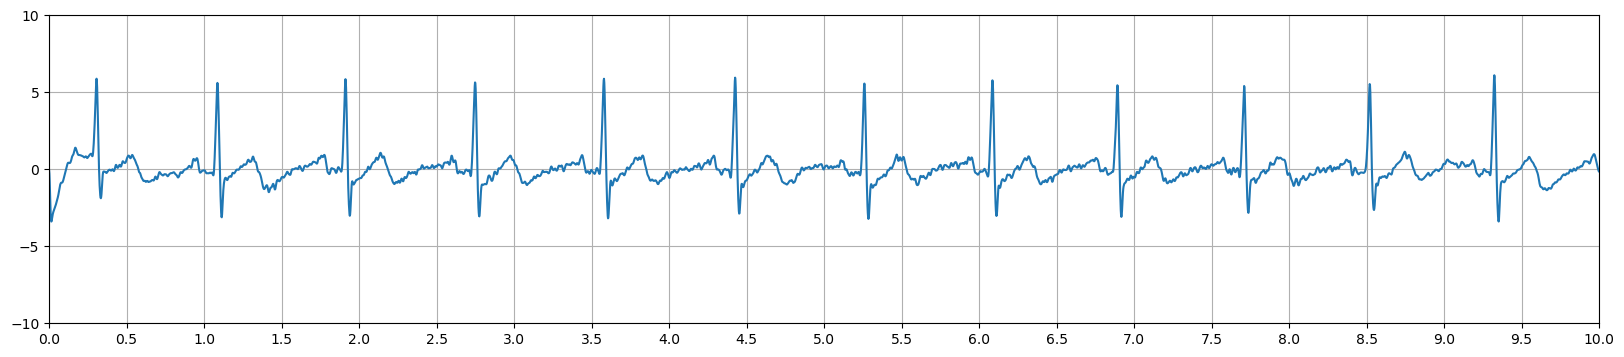

In [10]:
plotEKG(beat_mean[:,0])

ecg_adult_0 - age 53.0, gend 1


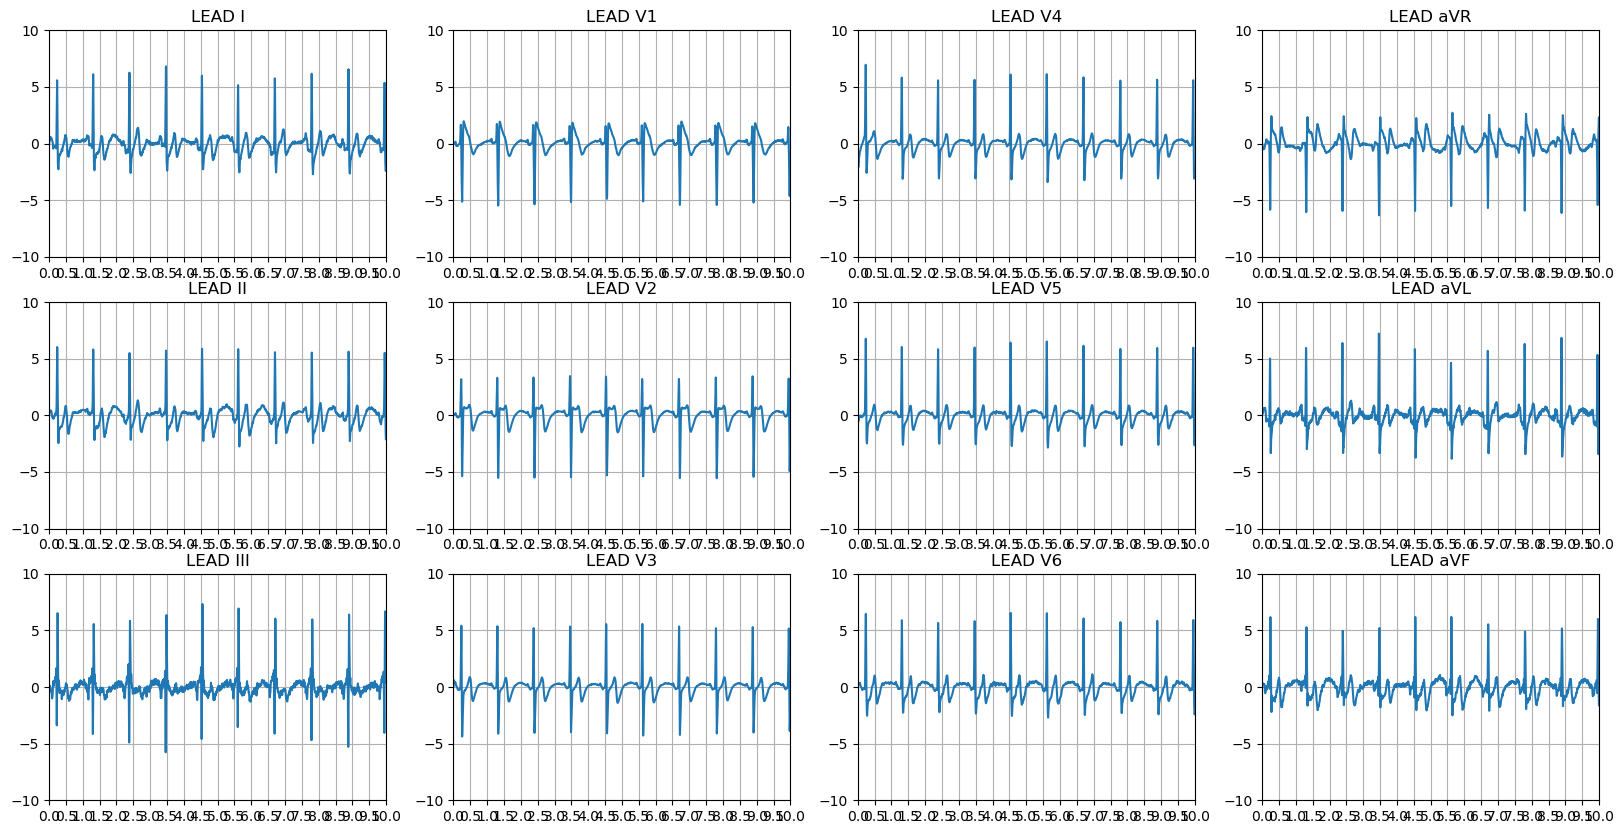

ecg_adult_2 - age 68.0, gend 1


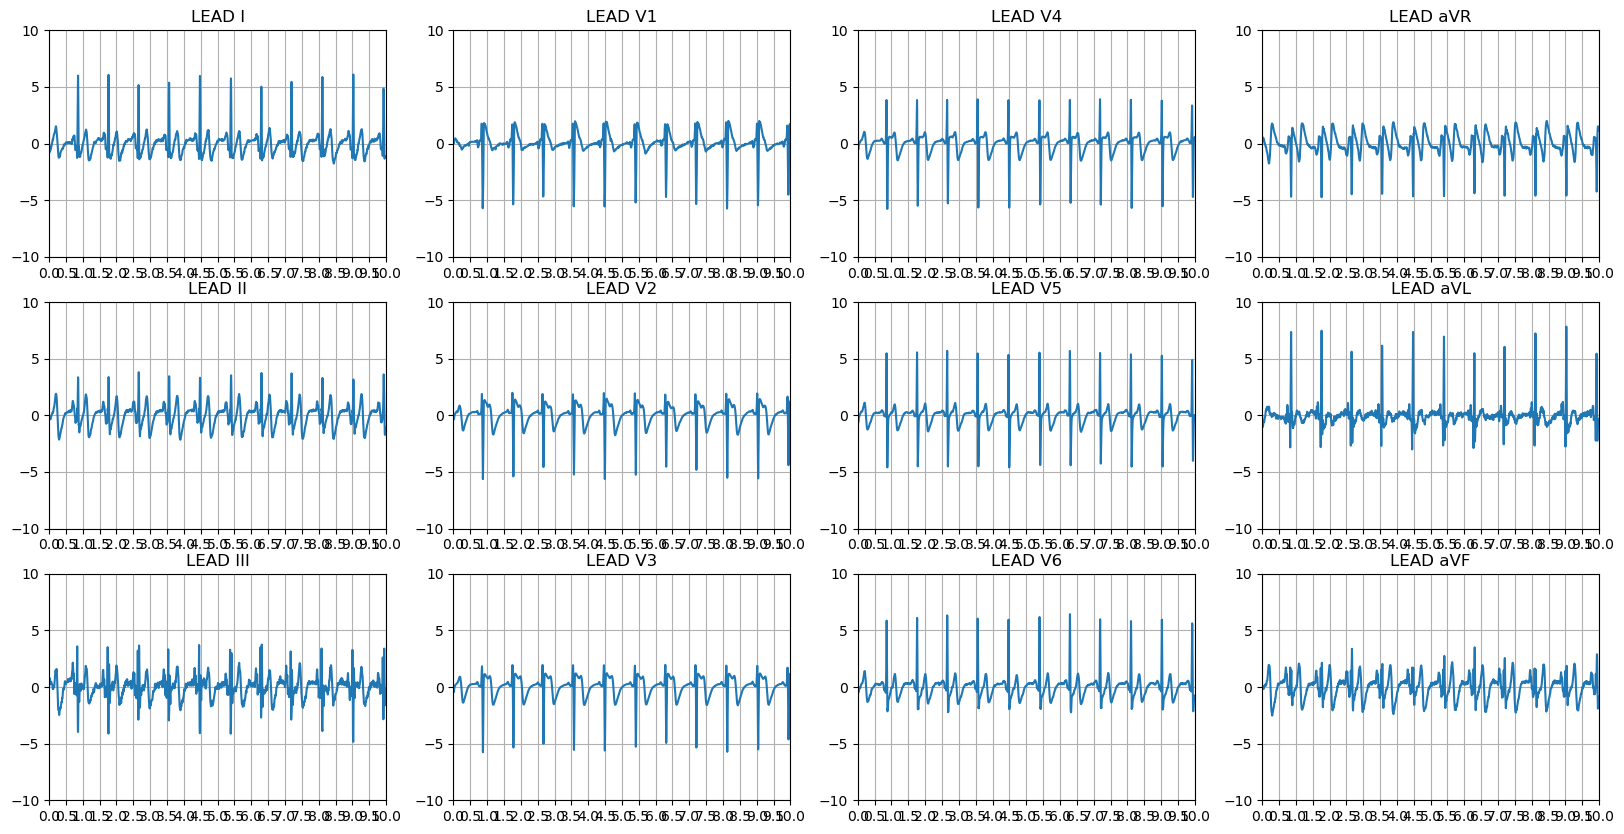

ecg_adult_4 - age 79.0, gend 1


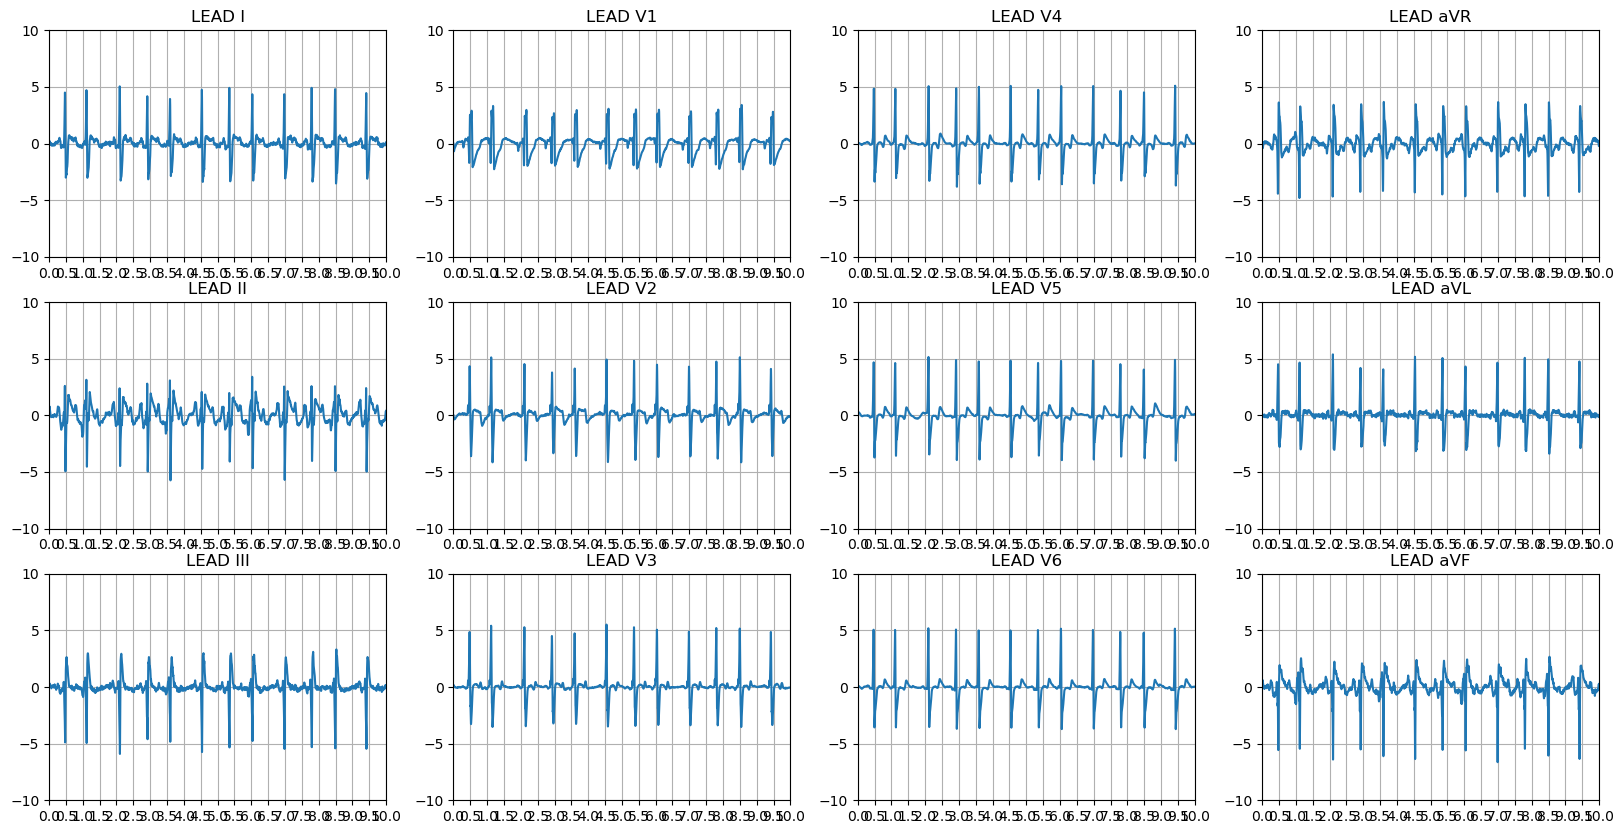

ecg_adult_5 - age 59.0, gend 0


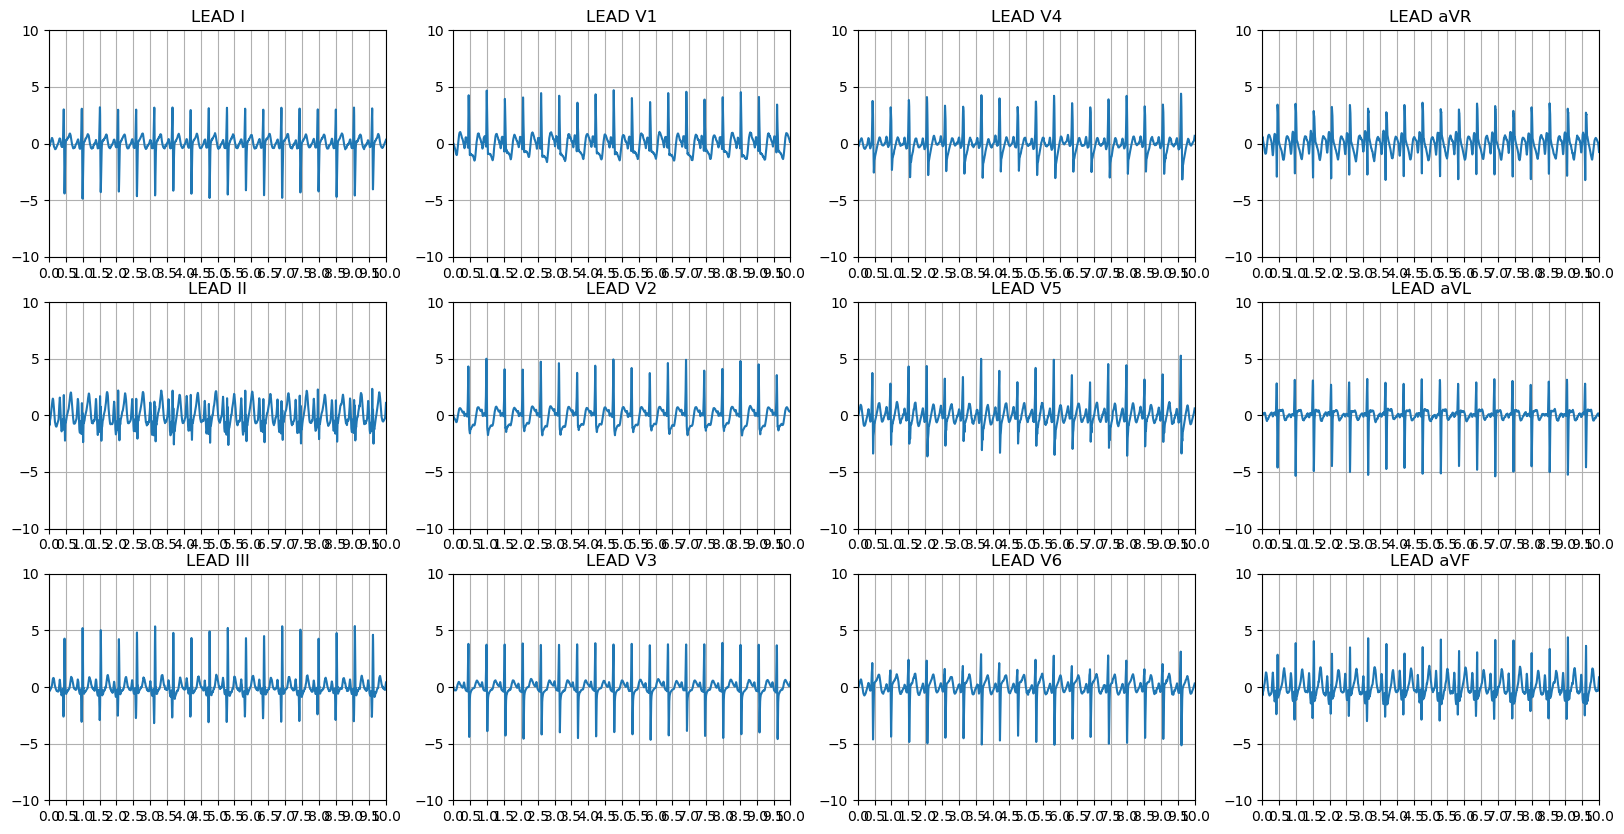

ecg_adult_6 - age 79.0, gend 1


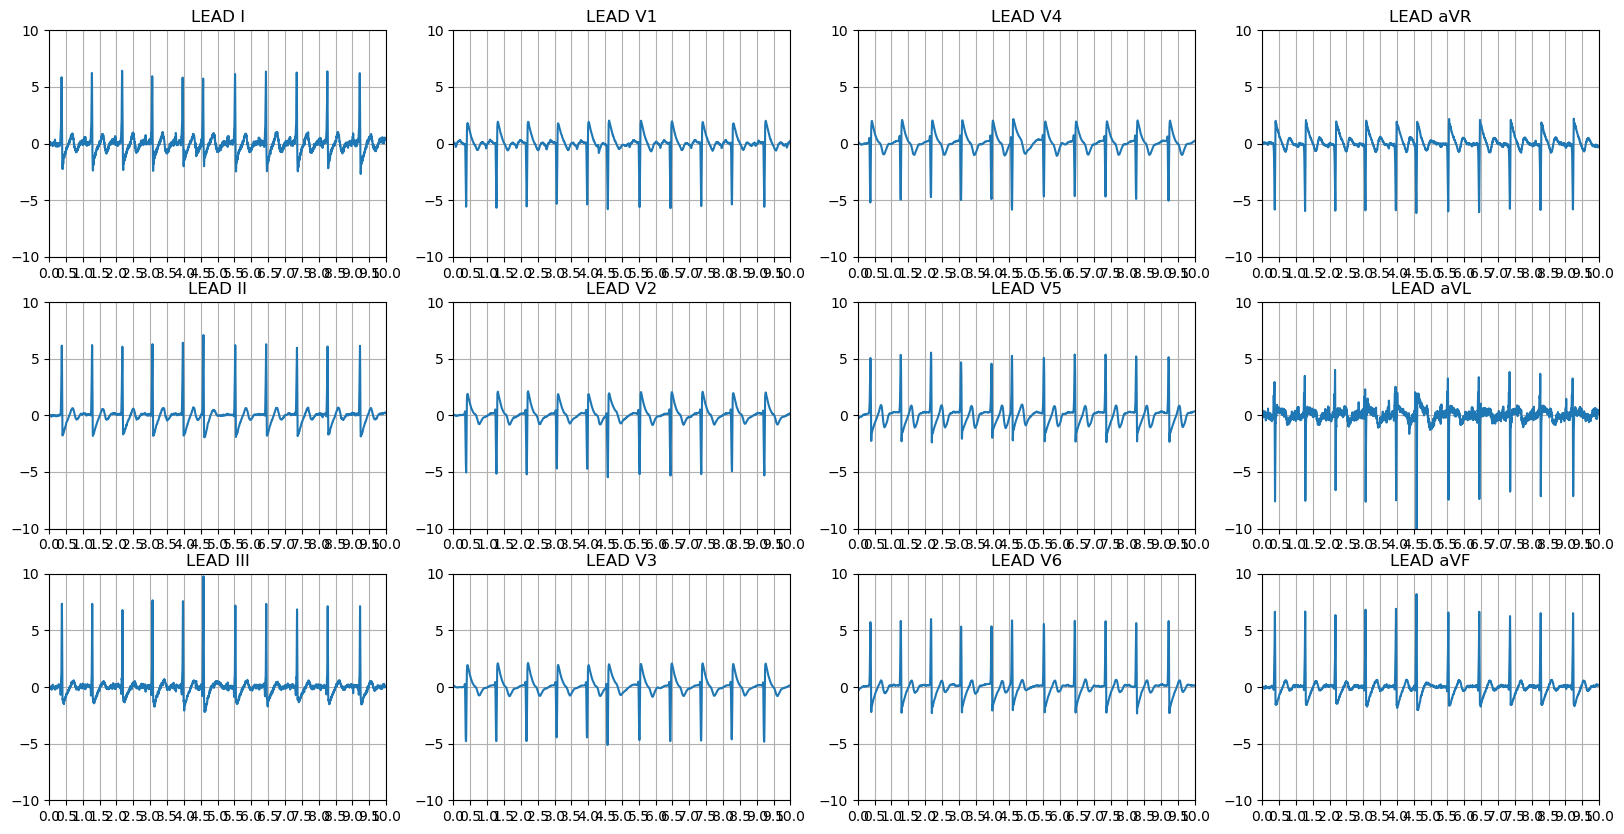

ecg_adult_7 - age 83.0, gend 1


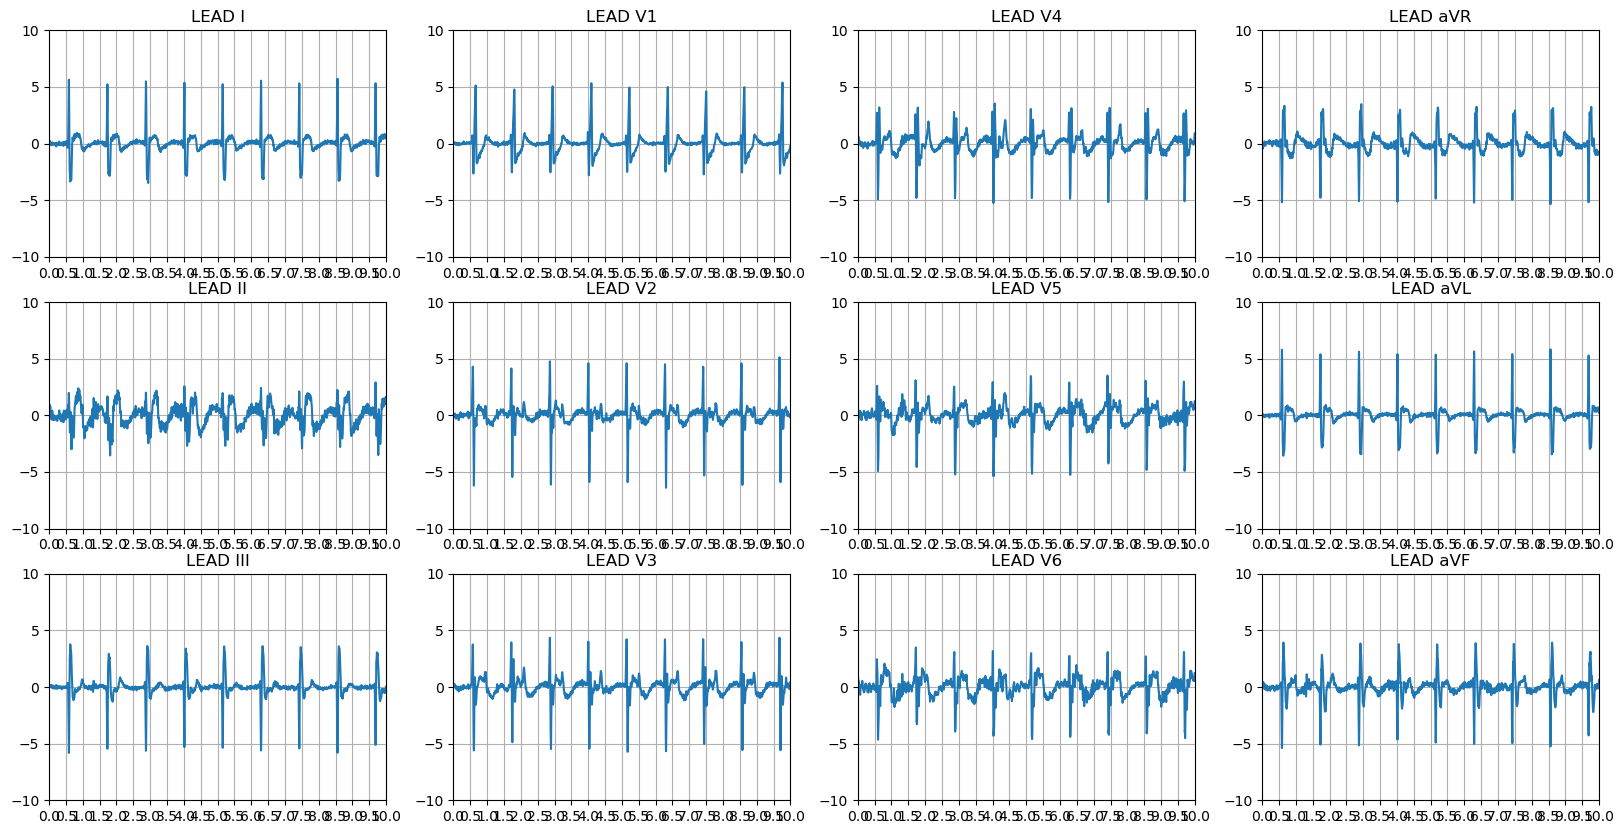

ecg_adult_10 - age 62.0, gend 0


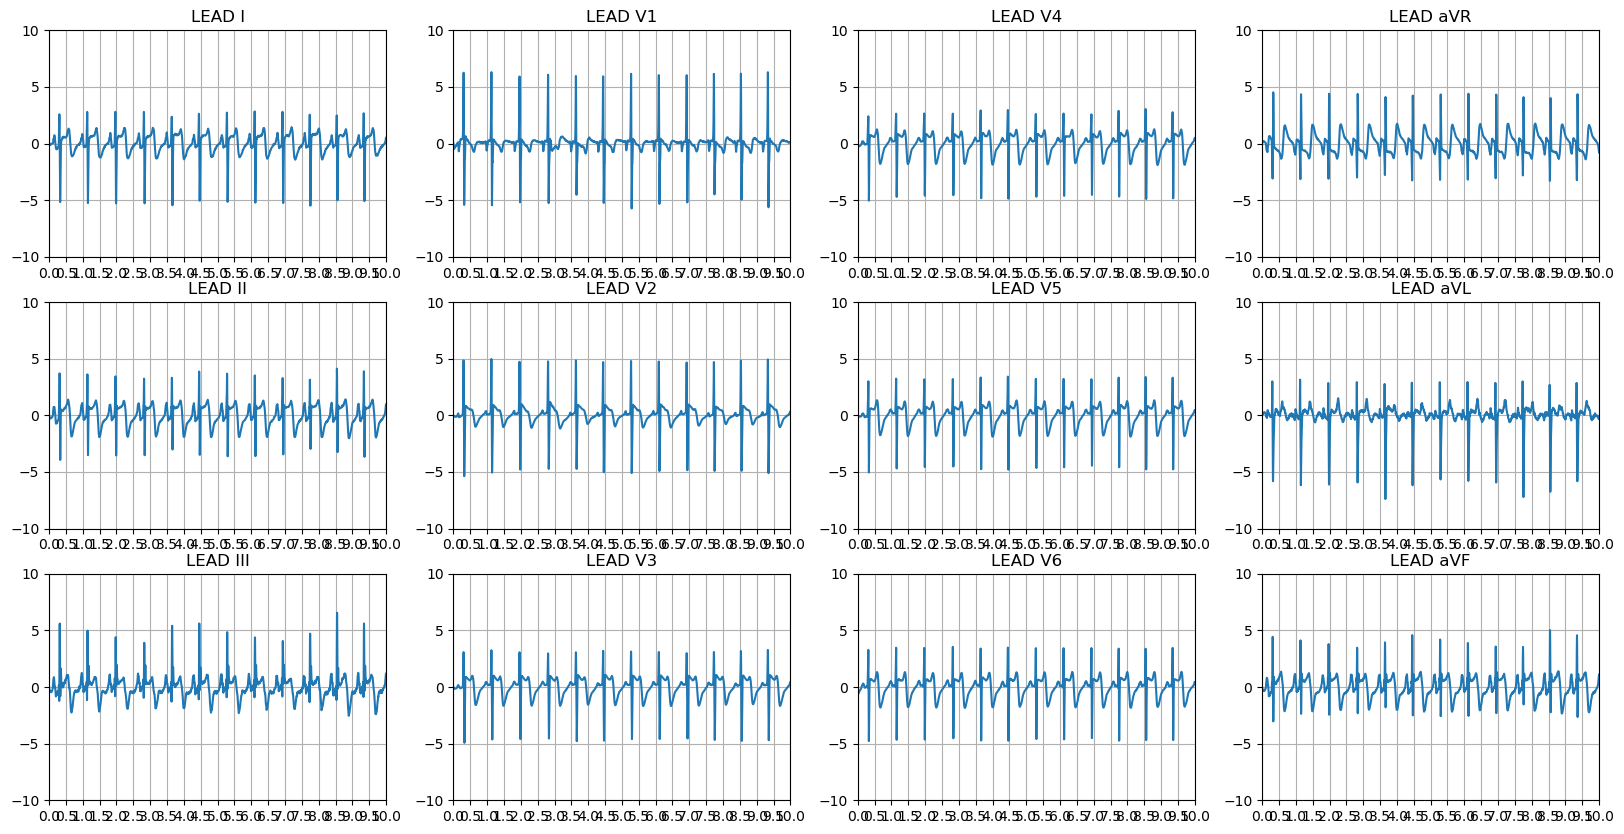

ecg_adult_11 - age 55.0, gend 0


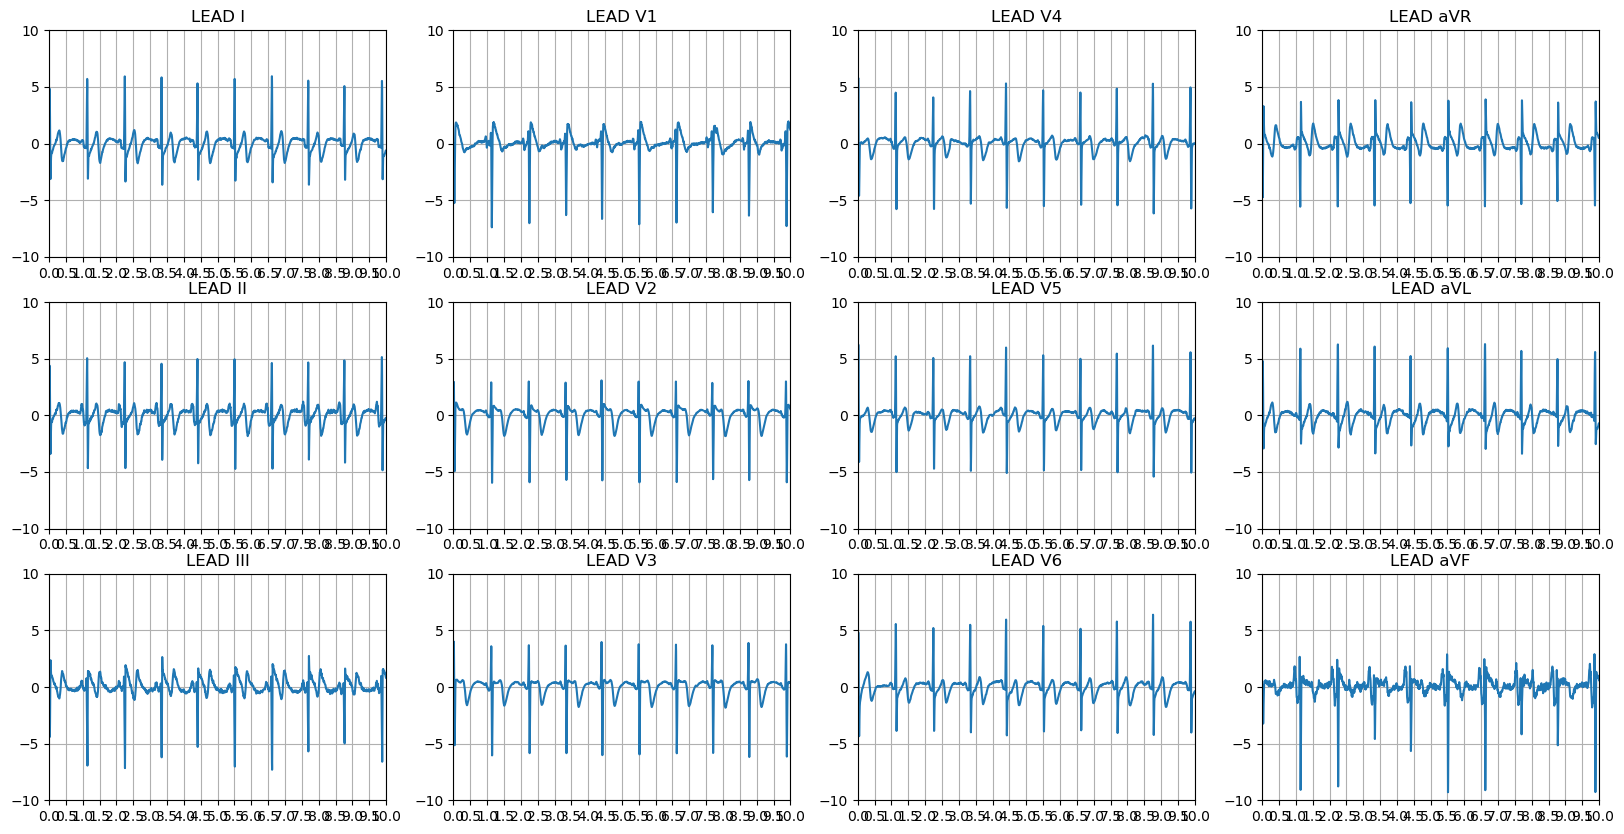

ecg_adult_12 - age 61.0, gend 1


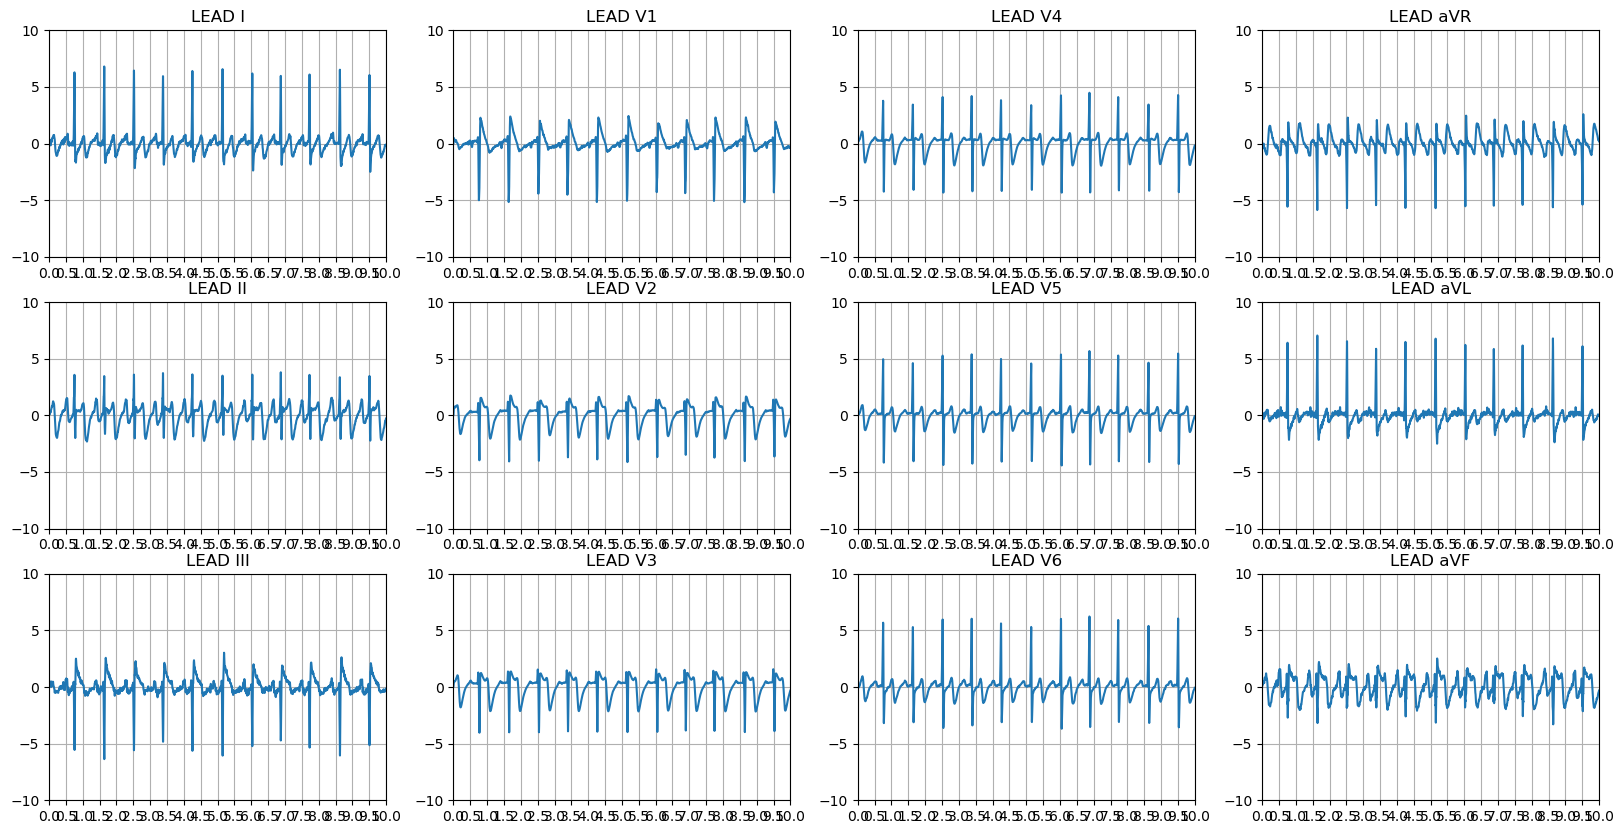

ecg_adult_13 - age 80.0, gend 1


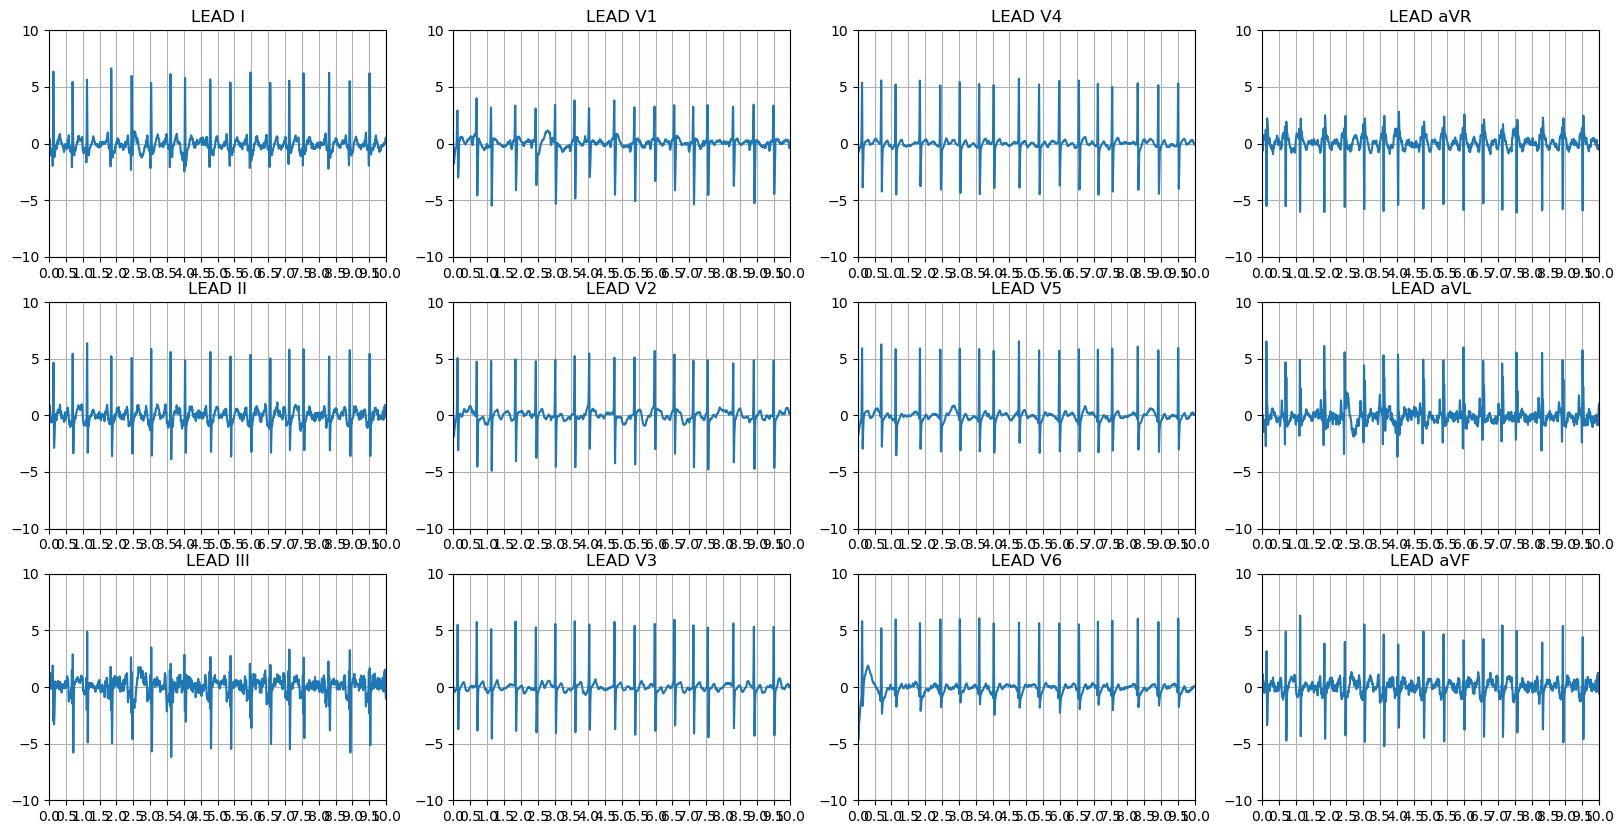

ecg_adult_14 - age 48.0, gend 0


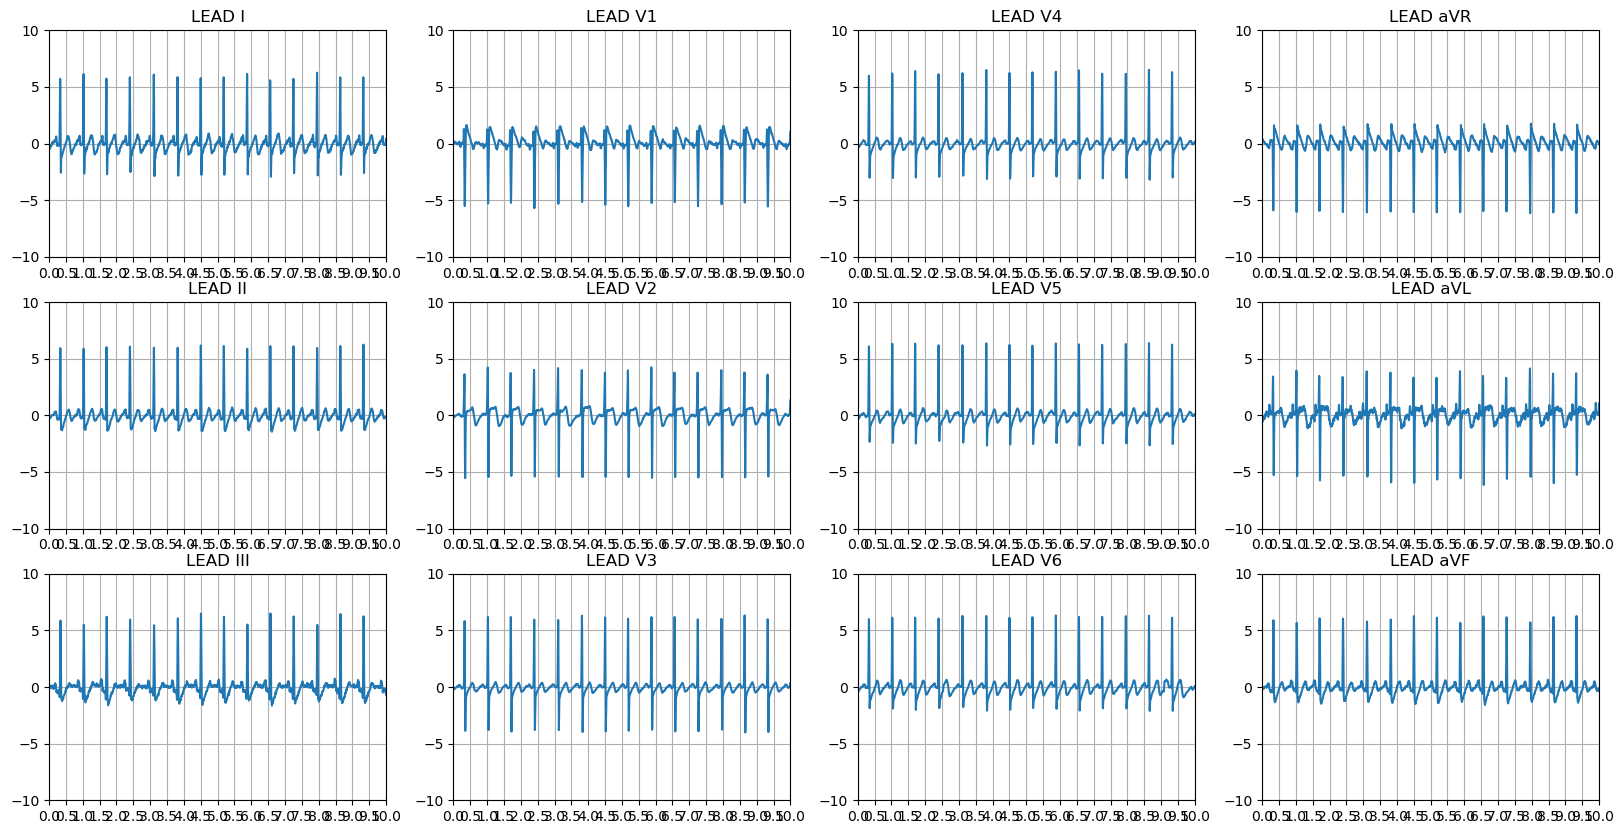

ecg_adult_16 - age 32.0, gend 0


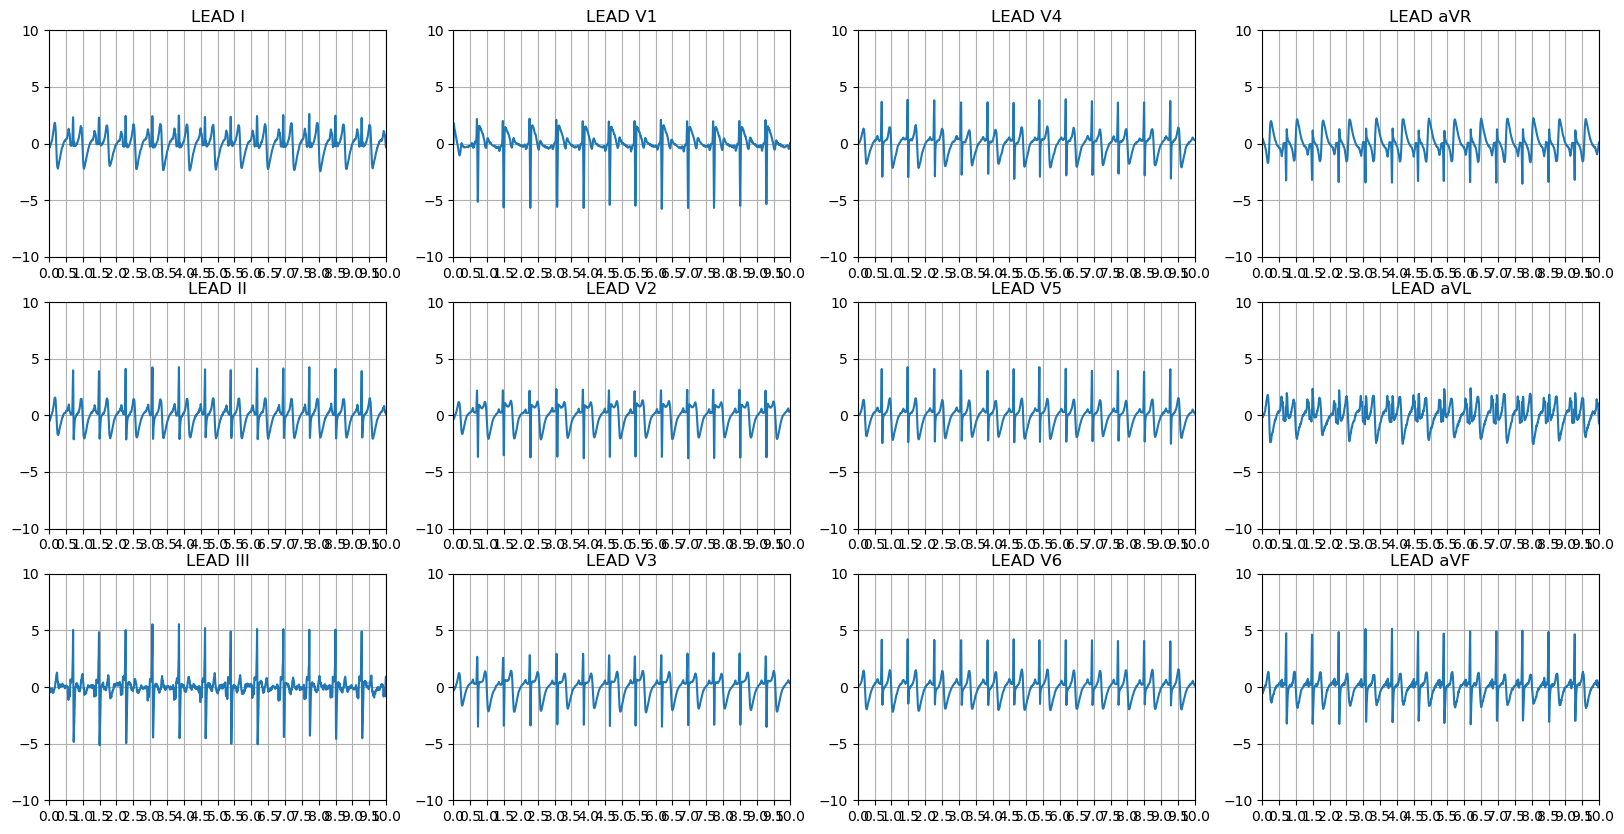

ecg_adult_17 - age 65.0, gend 1


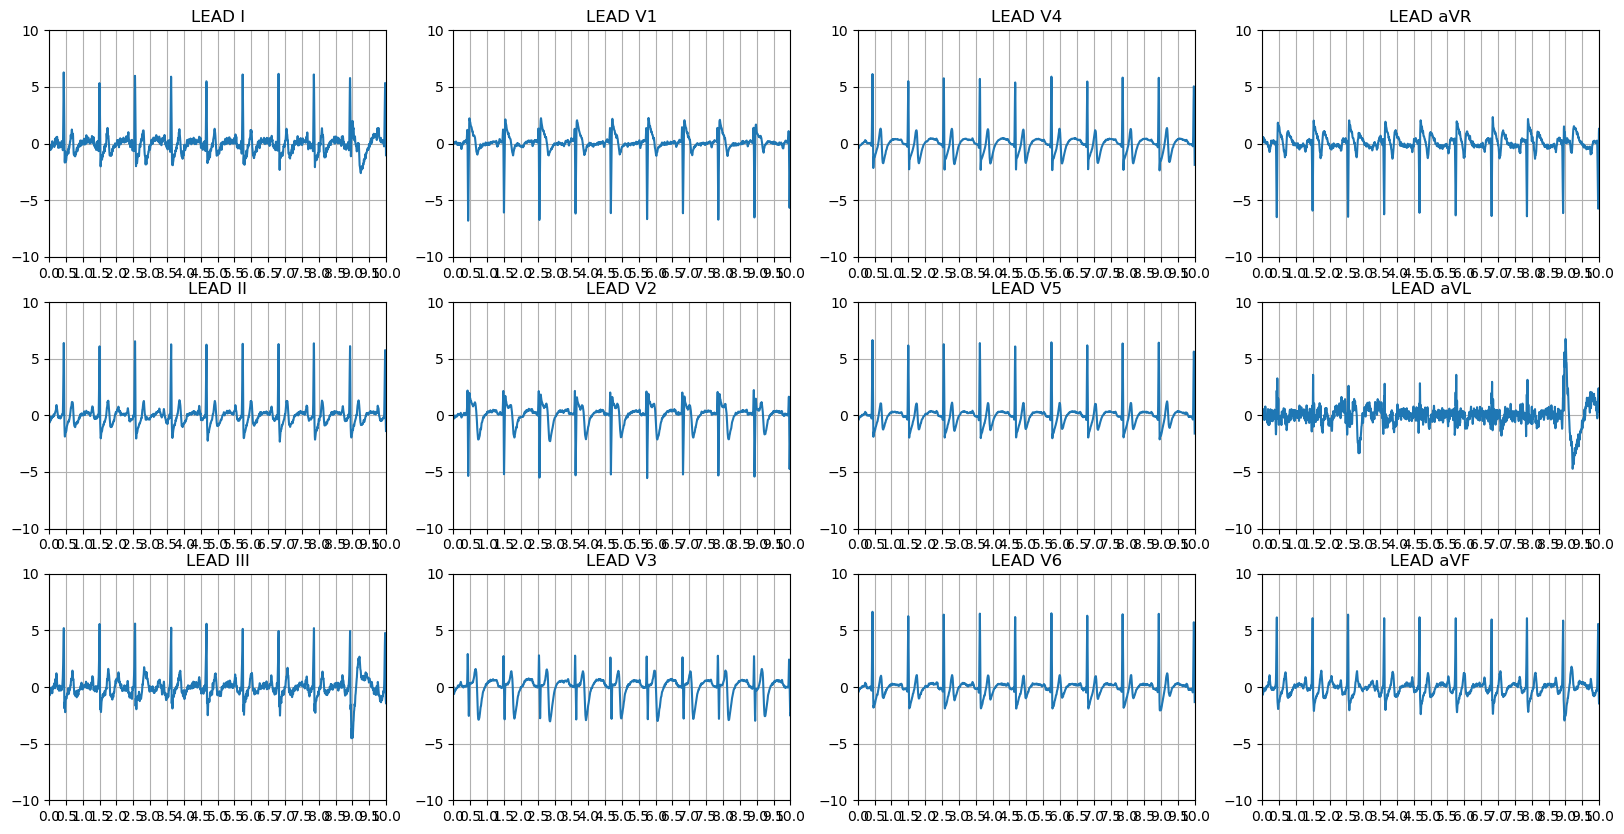

ecg_adult_19 - age 71.0, gend 0


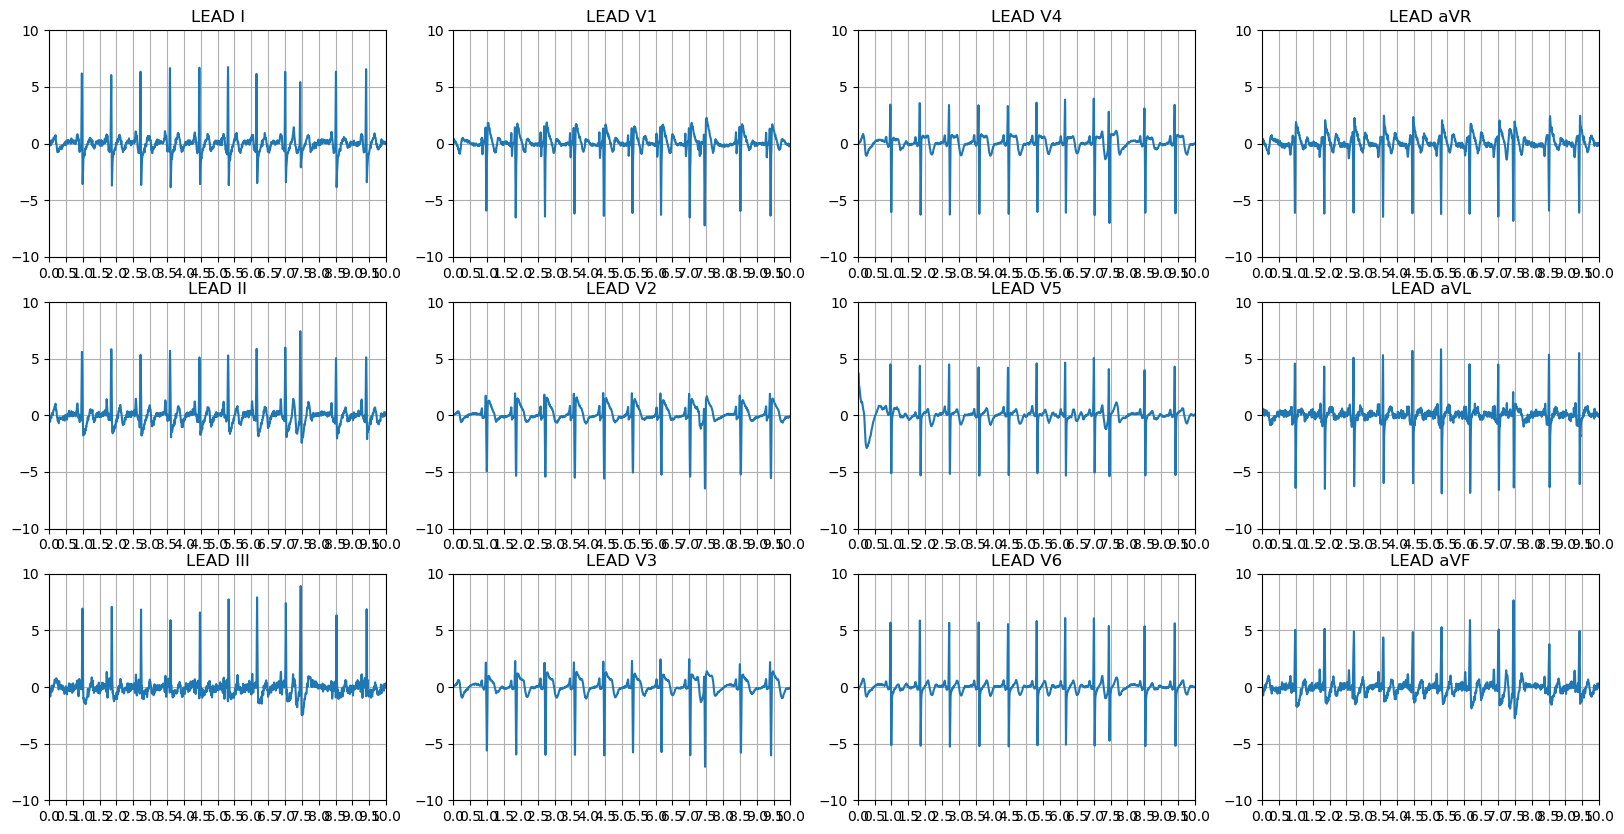

ecg_adult_20 - age 72.0, gend 0


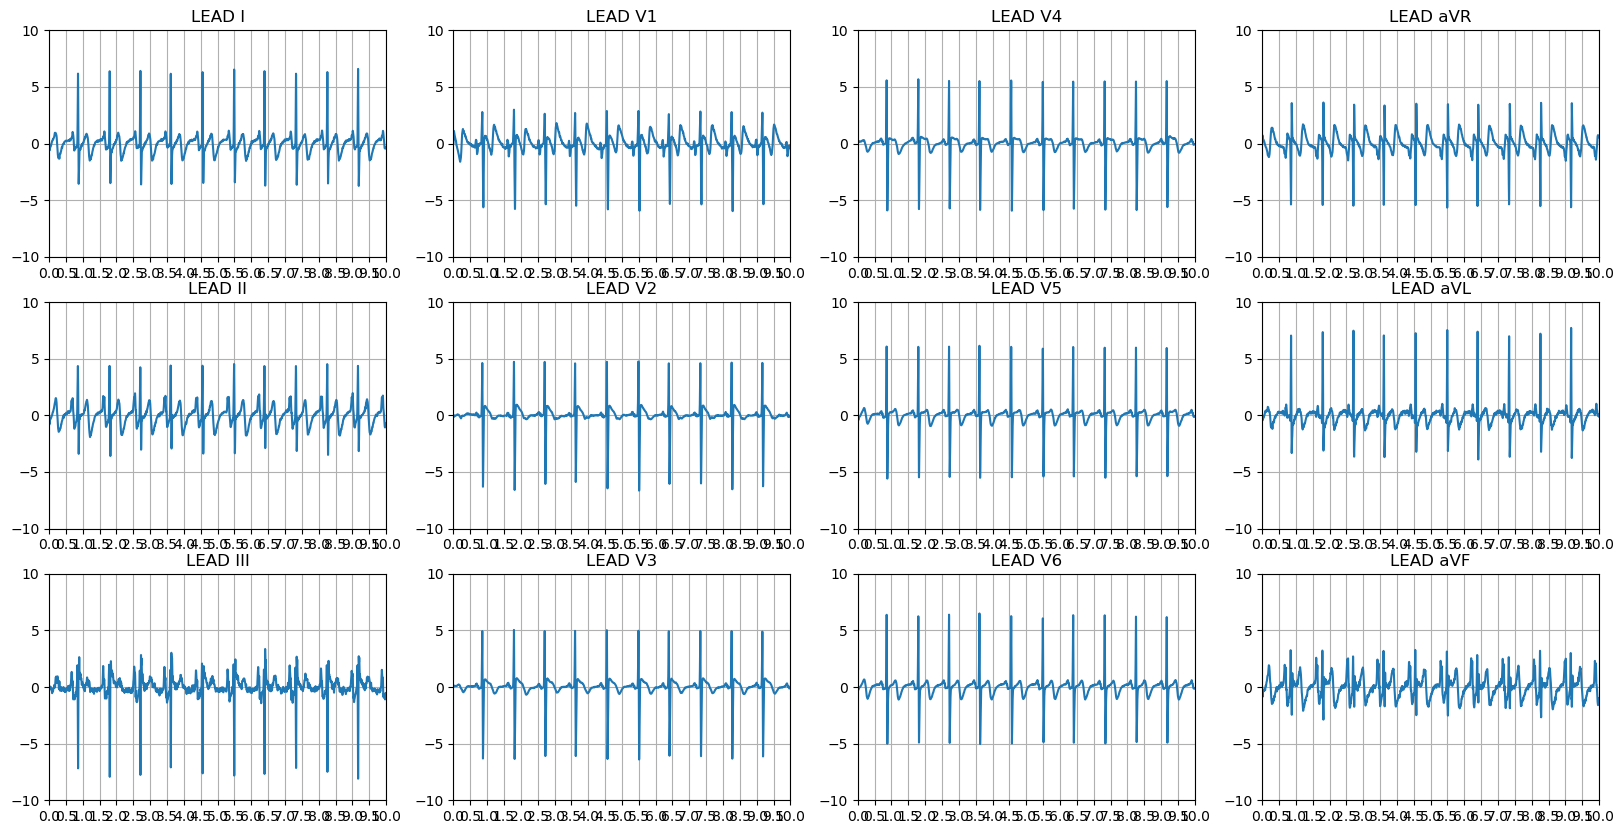

ecg_adult_22 - age 42.0, gend 0


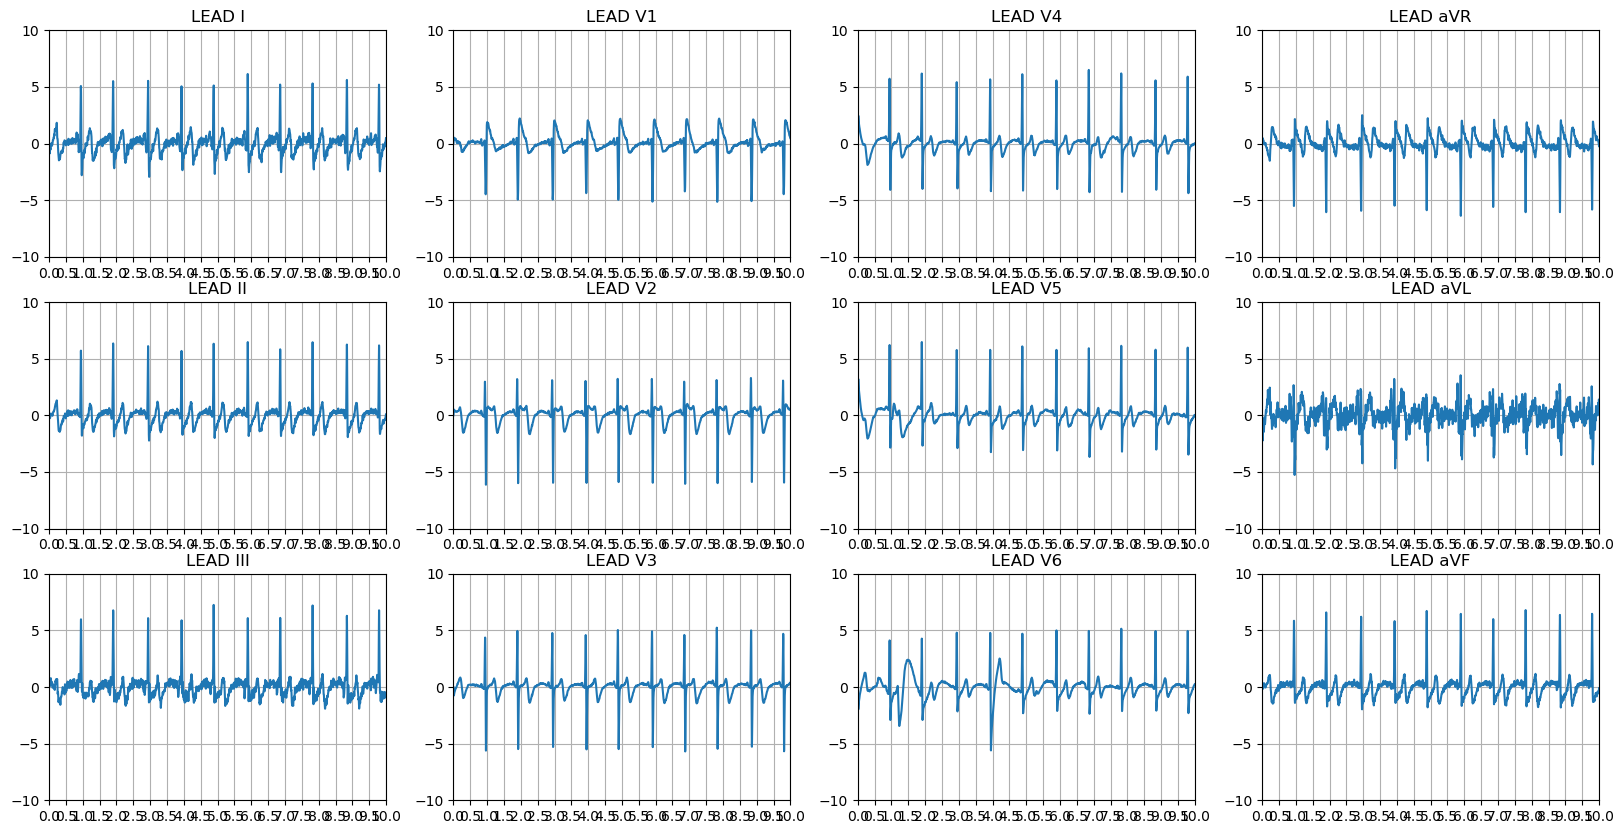

ecg_adult_23 - age 72.0, gend 0


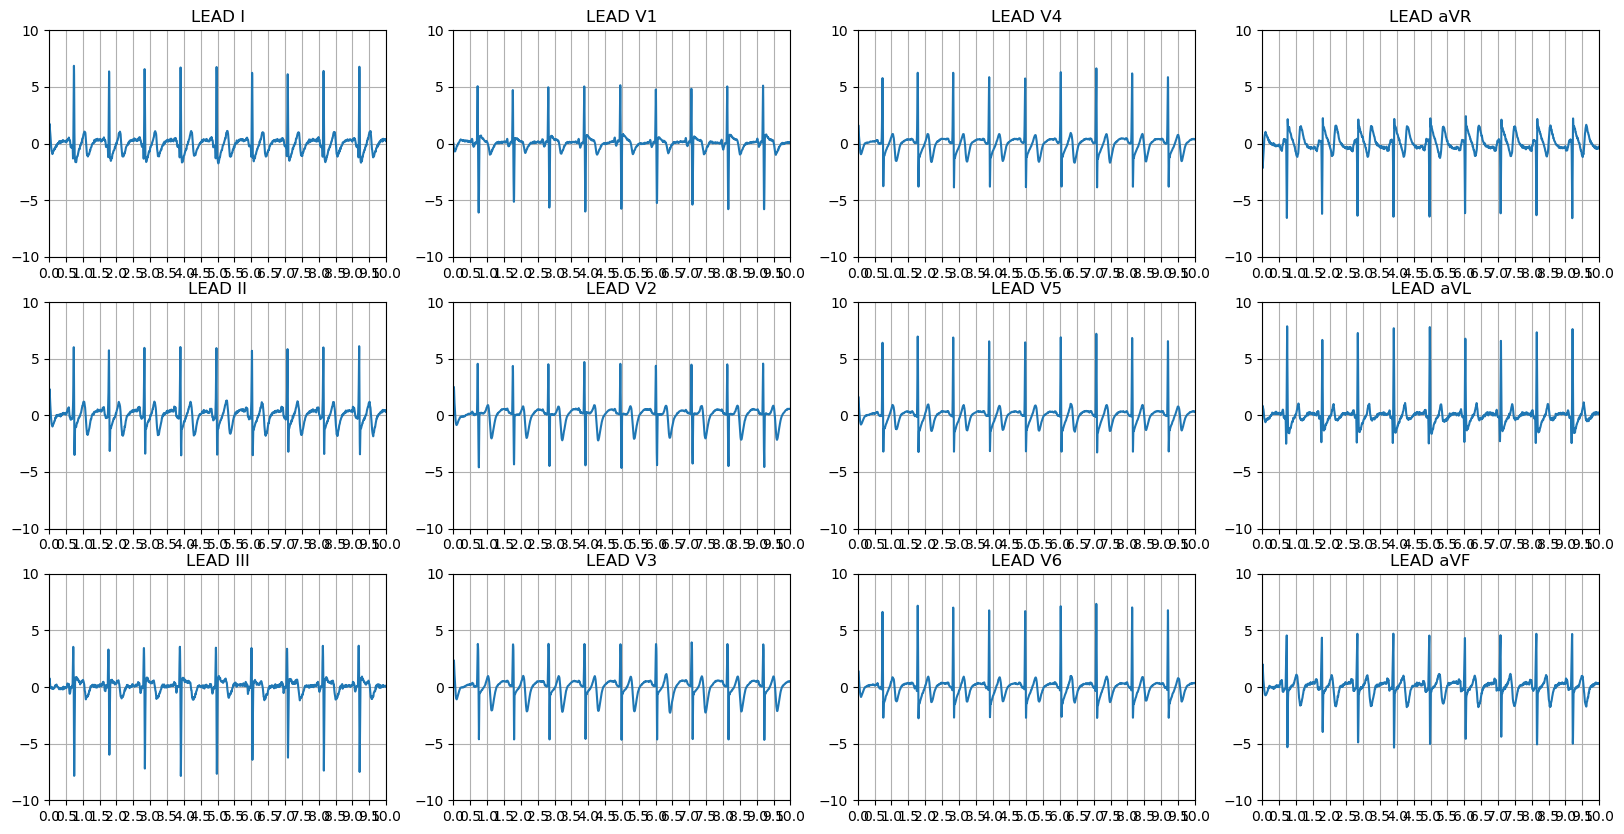

ecg_adult_24 - age 30.0, gend 1


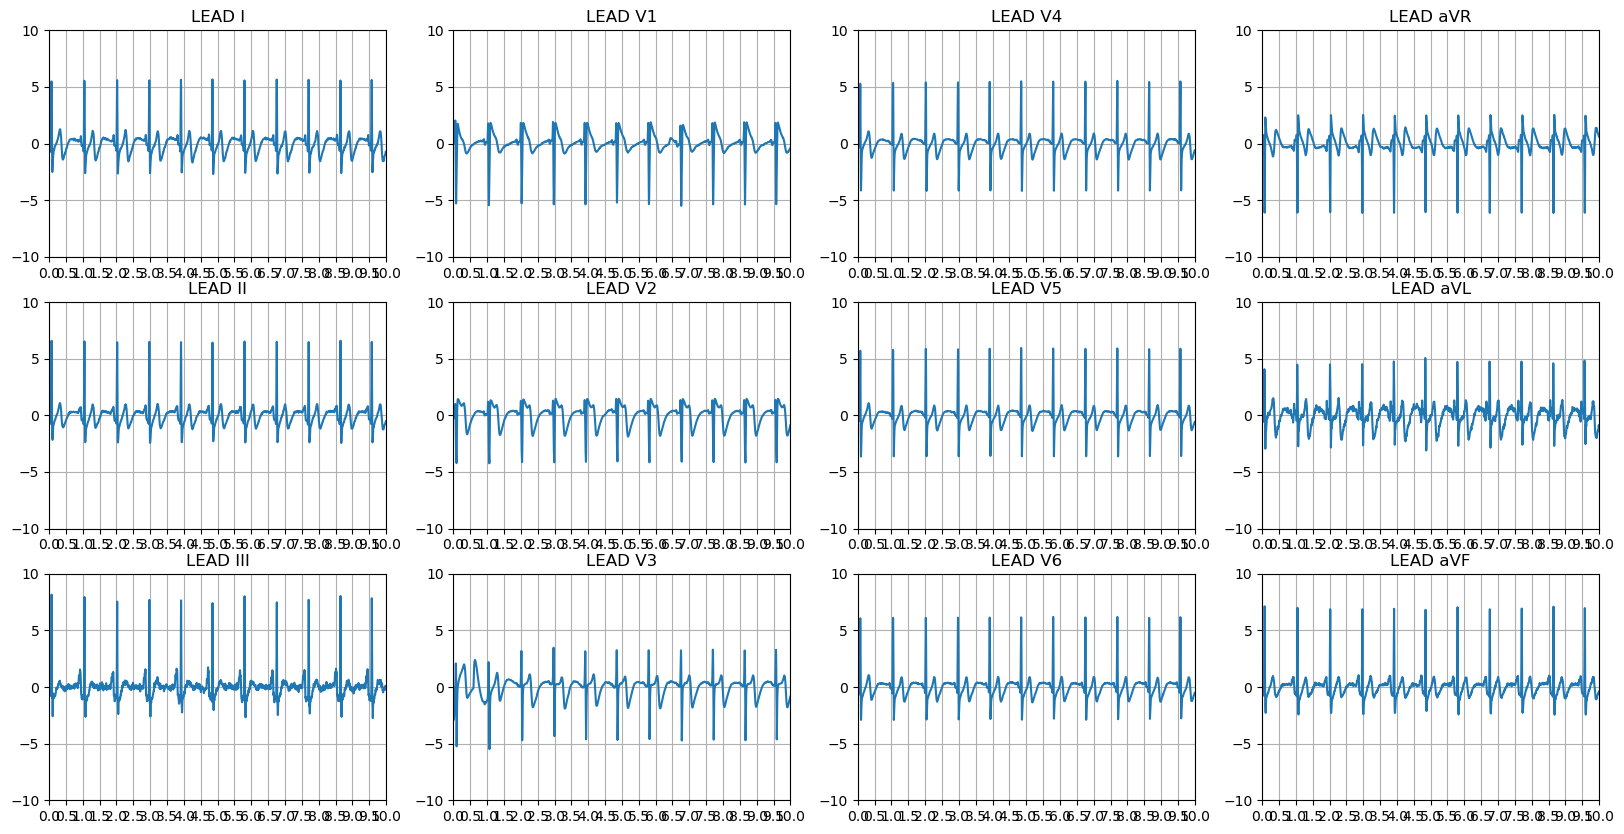

ecg_adult_26 - age 32.0, gend 0


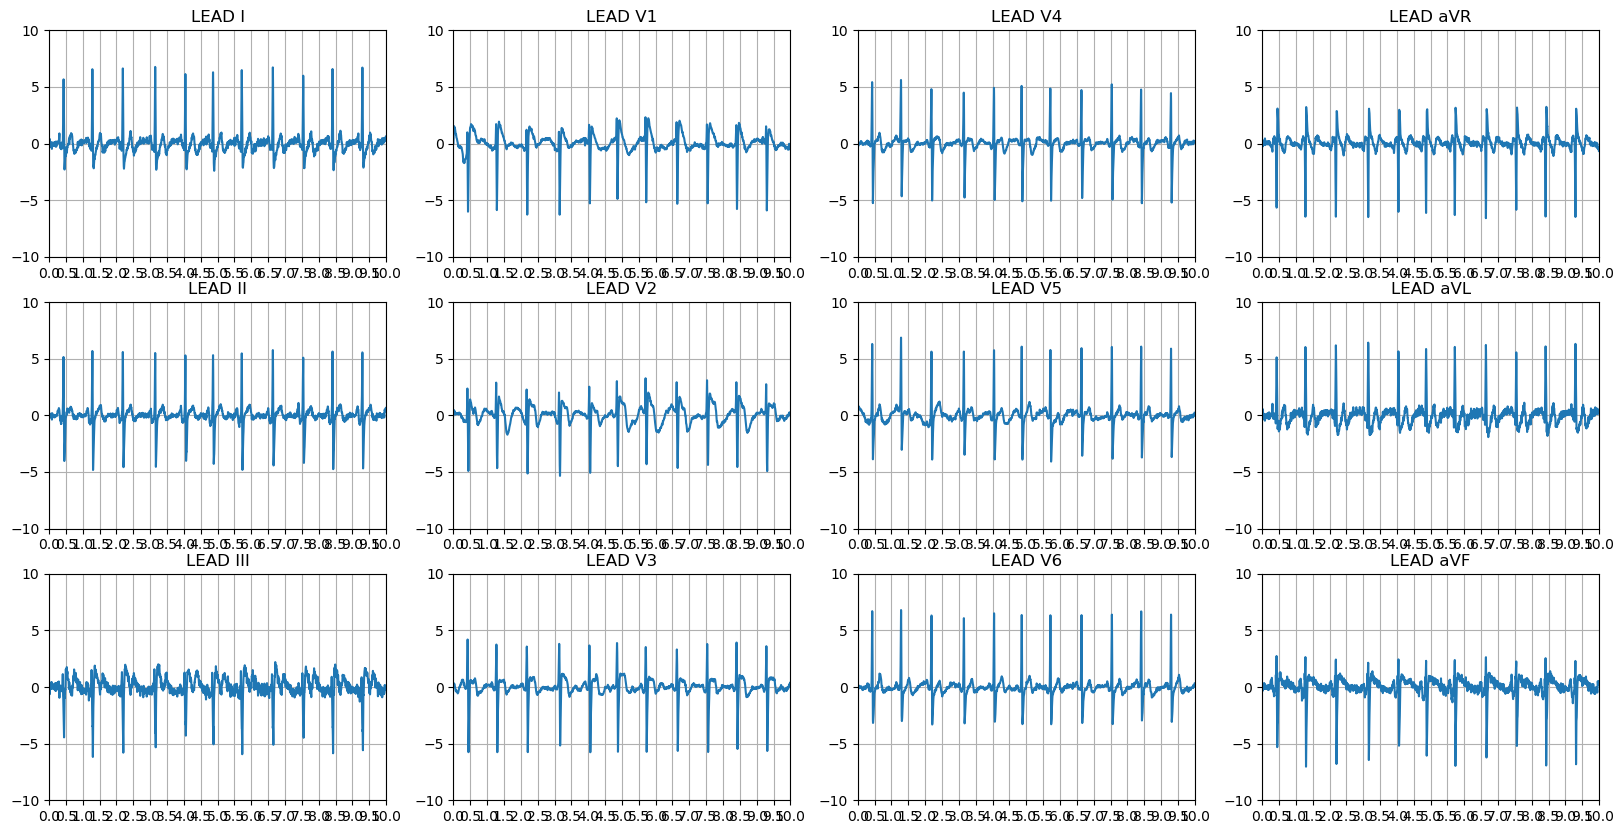

ecg_adult_27 - age 77.0, gend 0


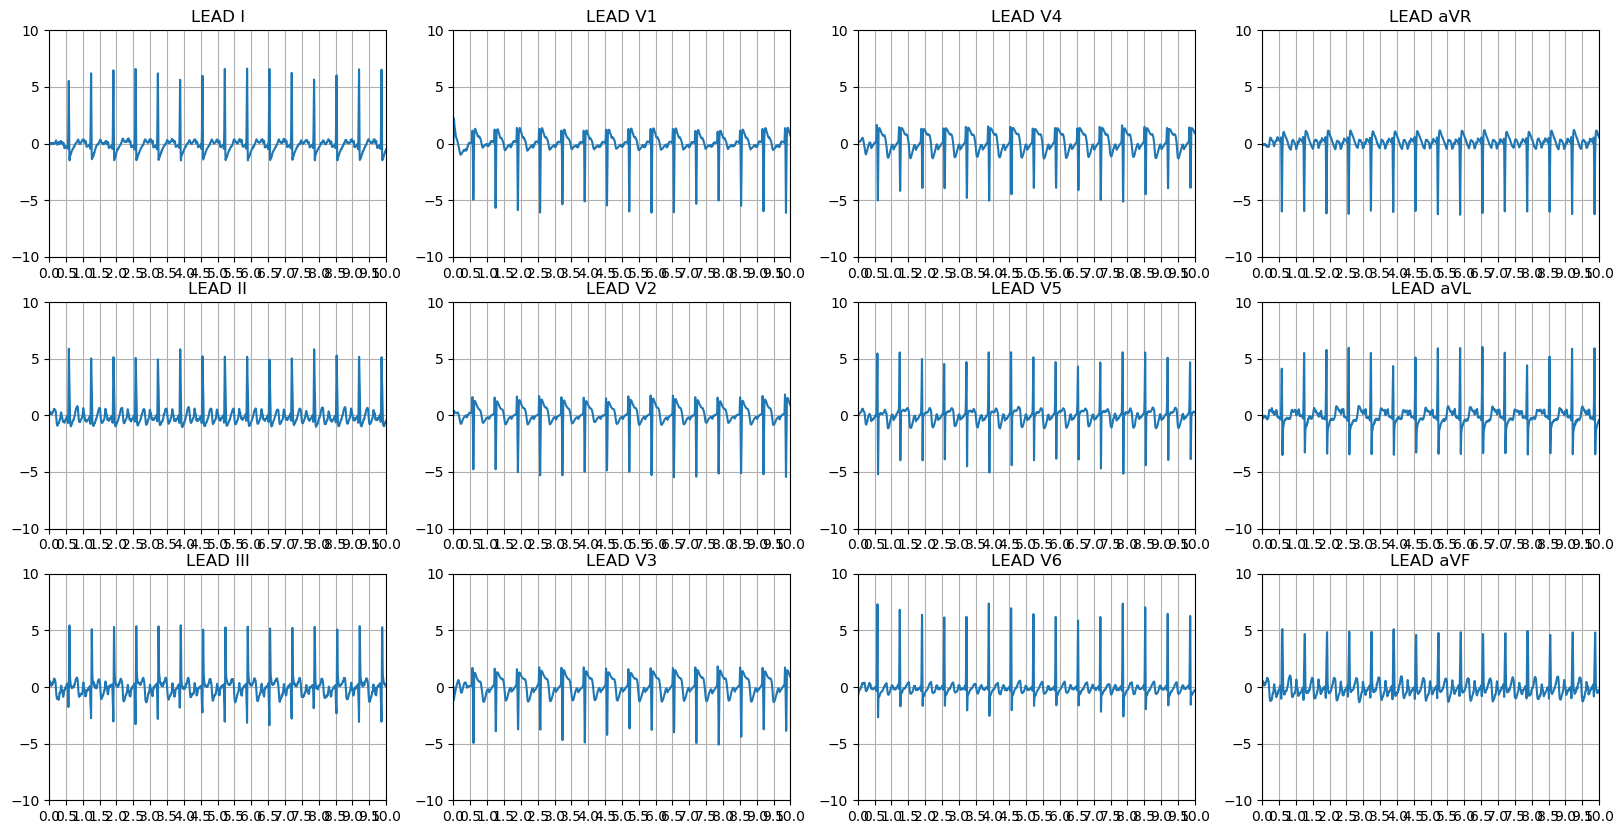

ecg_adult_28 - age 48.0, gend 1


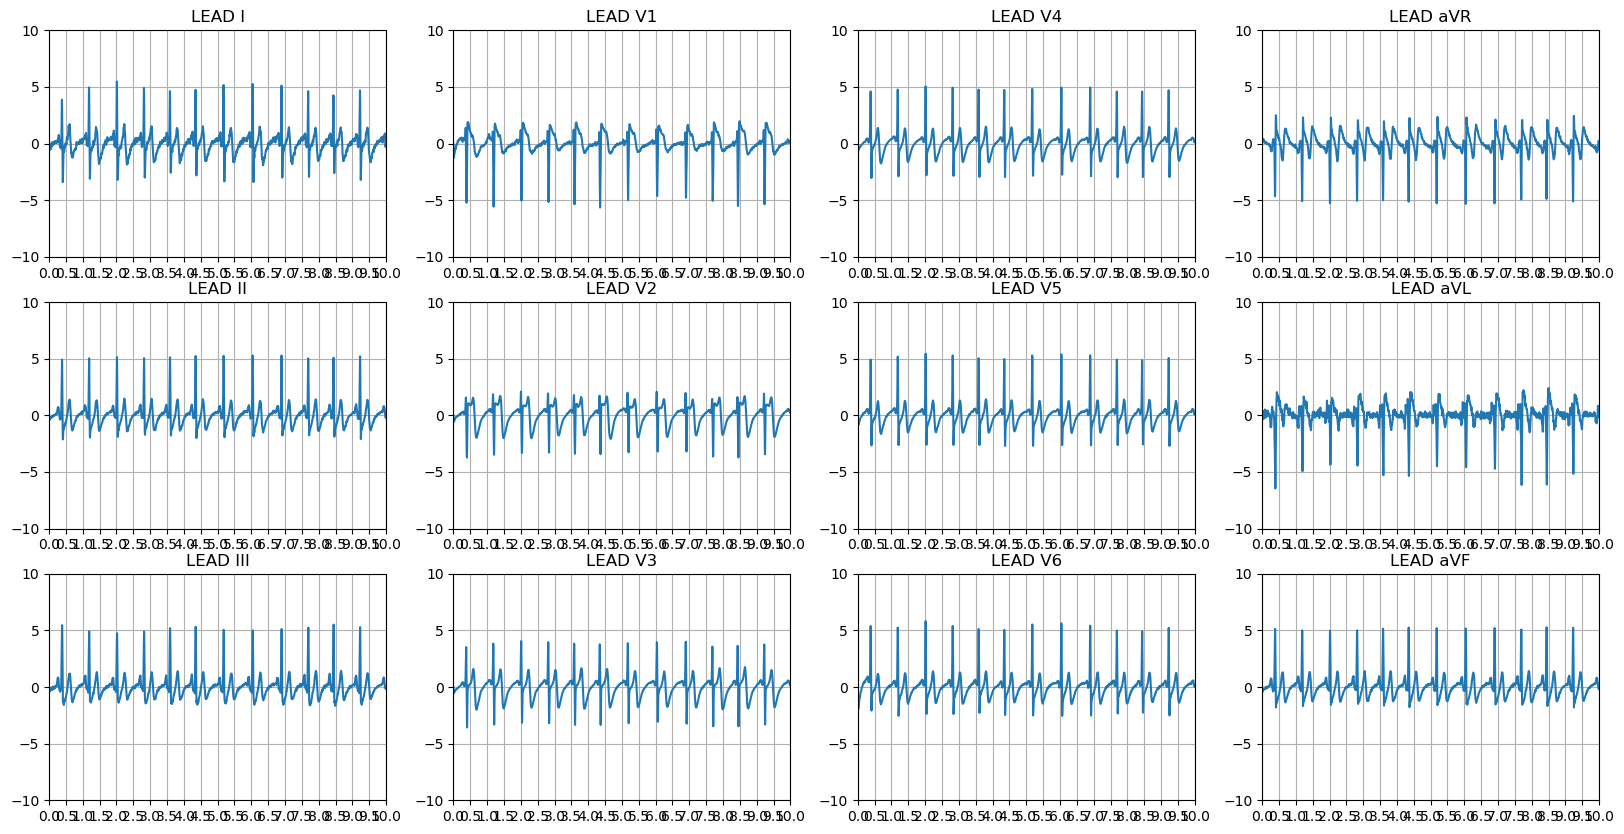

ecg_adult_30 - age 64.0, gend 0


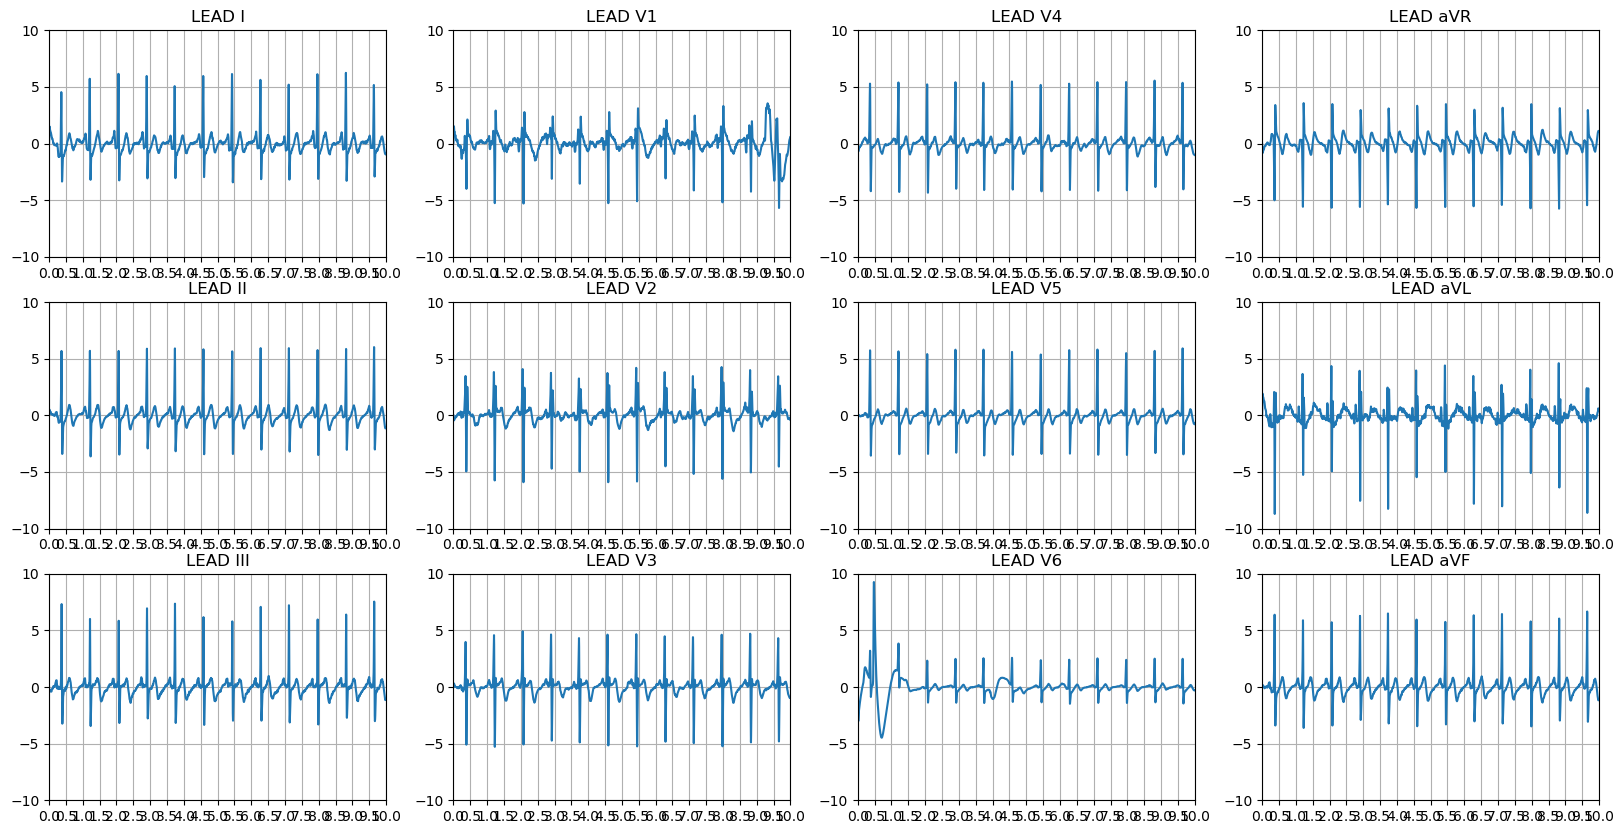

ecg_adult_31 - age 66.0, gend 1



KeyboardInterrupt



In [11]:
# Unmasked mean beat

for i in range(100):
    print(f'{c_train[i]} - age {y_train[i]}, gend {g_train[i]}')
    beat_mean = x_train[i,:,:]
    _, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
    for i in range(4):
        for j in range(3):
            lead_num = 3 * i + j
            plotEKG(beat_mean[:,lead_num], title=f'LEAD {LEAD_NAMES[lead_num]}', xticks=XTICKS_DEFAULT_10SEC, ax=axs[j][i])

    plt.show()